In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [53]:
file_path = Path('stock_prices.csv')
stock_prices = pd.read_csv(file_path)
stock_prices.head()

,Date,MSFT,KSU,CRWD,CCIV,PLUG,NIO,BABA,FUTU,TSLA,AMZN
0,3/25/2021,232.34,252.70,179.16,24.03,34.10,37.94,222.72,111.77,640.39,3046.26
1,3/26/2021,236.48,253.62,177.68,23.02,34.03,36.13,227.26,114.69,618.71,3052.03
2,3/29/2021,235.24,255.23,173.85,21.35,30.78,35.51,231.86,131.51,611.29,3075.73
3,3/30/2021,231.85,259.63,175.28,23.51,34.04,37.55,229.25,137.86,635.62,3055.29
4,3/31/2021,235.77,263.92,182.51,23.18,35.84,38.98,226.73,158.82,667.93,3094.08


In [64]:
# stock_prices.describe()

In [61]:
# initial_prices=stock_prices[stock_prices['Date']=='3/25/2021']
stock_prices=stock_prices.set_index('Date')
initial_prices=stock_prices.iloc[0]#.to_dict()
initial_shares=1000/initial_prices#.drop('Date', axis=1)
#stock_prices=stock_prices.set_index('Date')
# stock_prices
initial_shares_dict=initial_shares.to_dict()
#initial_shares_dict
for idx, row in stock_prices.iterrows():
    current_portfolio=0
    for each_ticker, shares in initial_shares_dict.items(): 
        current_portfolio+=row[each_ticker]*shares
#     print(current_portfolio)
    stock_prices.loc[idx, 'Portfolio']=current_portfolio
stock_prices['Portfolio']=stock_prices.applymap(lambda x: x*initial_shares_dict[x])

In [69]:
stock_prices['Portfolio_Previous_Day']=stock_prices['Portfolio'].shift(1)
stock_prices['Daily_Return']=(stock_prices['Portfolio']/stock_prices['Portfolio_Previous_Day'])-1
stock_prices[['Daily_Return']]#.plot()

,Daily_Return
Date,
3/25/2021,NaN
3/26/2021,-0.006404
3/29/2021,-0.003437
3/30/2021,0.032968
3/31/2021,0.038164
4/1/2021,0.004381
4/5/2021,-0.004479
4/6/2021,0.015339
4/7/2021,-0.026308


<AxesSubplot:xlabel='Date'>

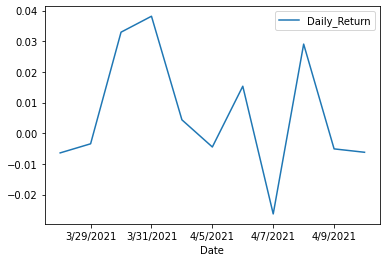

In [70]:
stock_prices[['Daily_Return']].plot()

<AxesSubplot:xlabel='Date'>

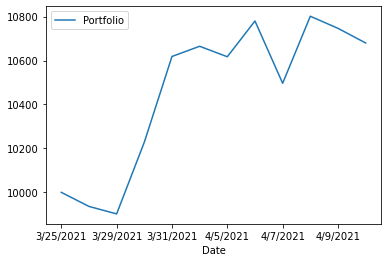

In [71]:
stock_prices[['Portfolio']].plot()